In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from datasets import *
# source https://multibandtexture.recherche.usherbrooke.ca/original_brodatz.html
data = Dataset("datasets/Original Brodatz")
print(len(data.images))
imgs = data.ToNumpy()

112


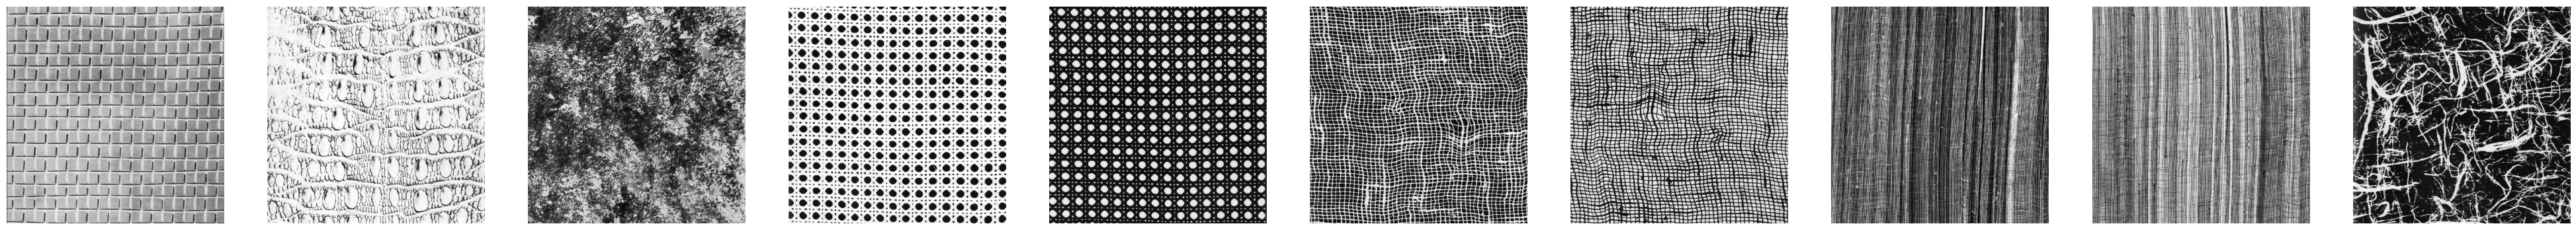

In [10]:
from vizutils import *

ImShowArray(imgs[:10])

# Autocorelation

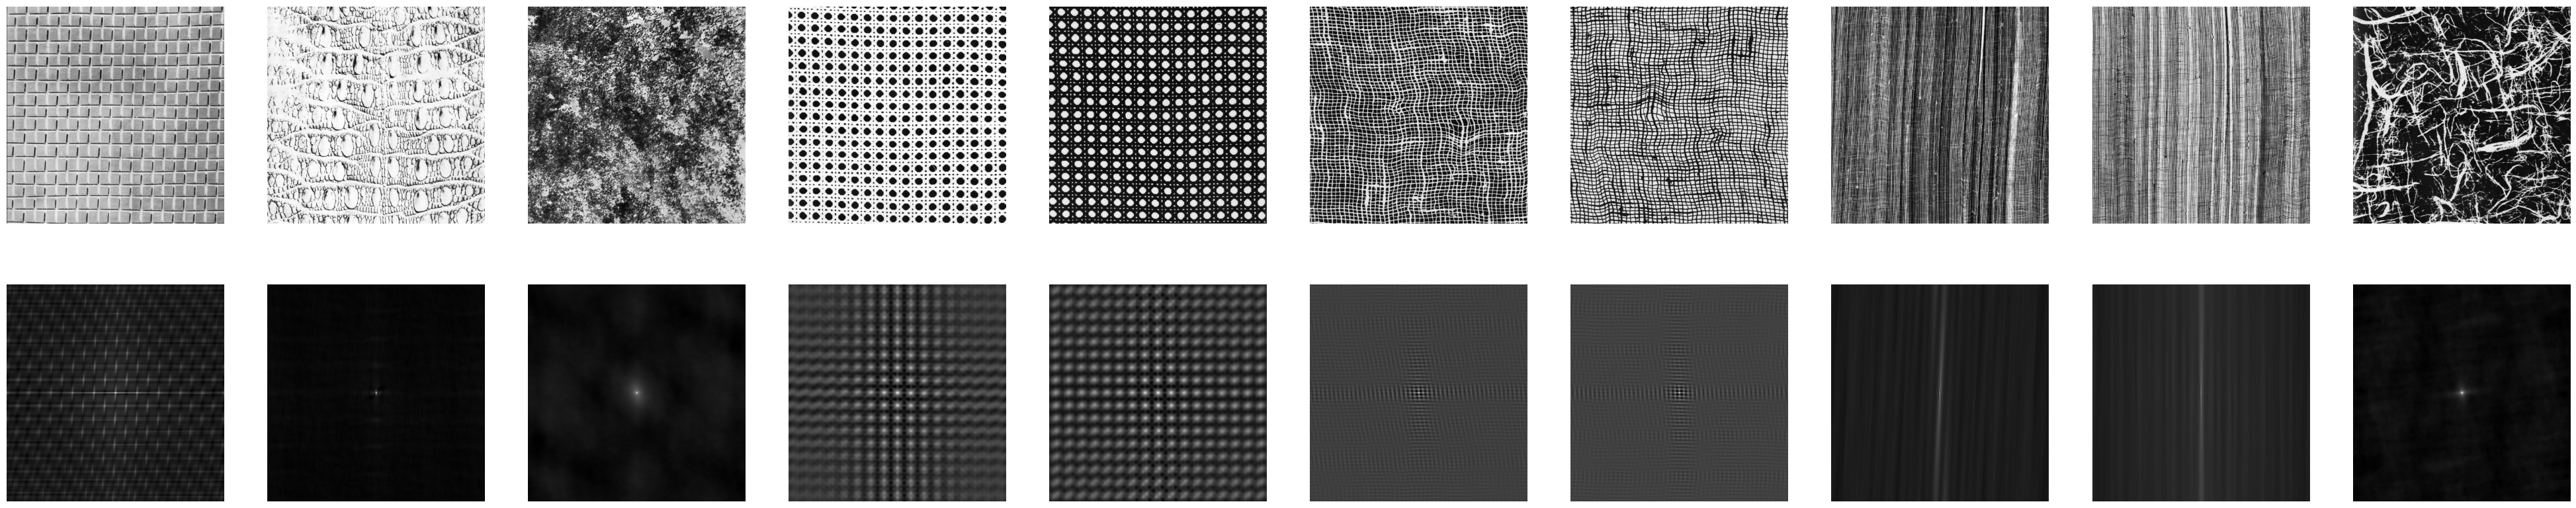

In [11]:
from vizutils import *
from computils import *
def Autocorrelation(x):
  """FFT based autocorrelation function, which is faster than numpy.correlate"""
  # x is supposed to be an array of sequences, of shape (totalelements, length)
  length = x.shape[1]
  fftx = np.fft.fft2(x)
  ret = np.fft.ifft2(fftx * np.conjugate(fftx))
  ret = np.fft.fftshift(ret)
  return ret.real
np.convolve
res = Calc(imgs[:10], Autocorrelation)
ImShowArrayWithImages(imgs[:10], res)

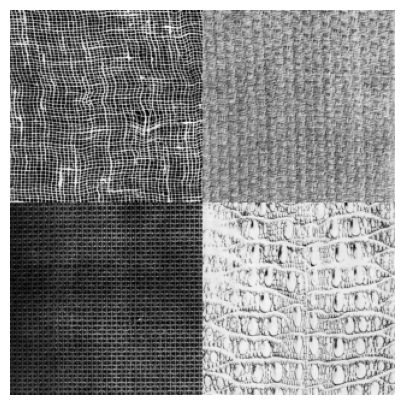

  0%|          | 0/289 [00:00<?, ?it/s]

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [2. 2. 2. ... 3. 3. 3.]
 [2. 2. 2. ... 3. 3. 3.]
 [2. 2. 2. ... 3. 3. 3.]]


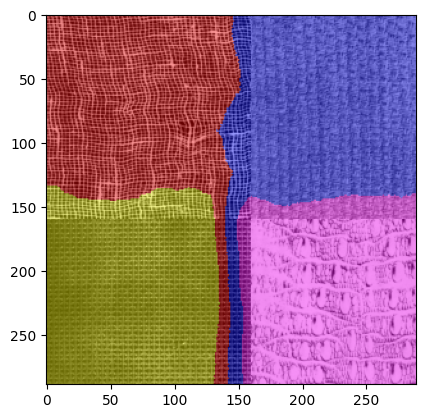

In [12]:
test_imgs = [imgs[5],imgs[93],imgs[60],imgs[1]]
SegmentationExampleVectorDescriptor(test_imgs, Autocorrelation,160,False,random_patches=True, window_size=32)